<a href="https://colab.research.google.com/github/silverspell/ColabML/blob/master/pima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler as Scaler

# Load Data

In [0]:
dataset = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", sep=",", header=None)
dataset.columns = ["NumTimesPreg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]
dataset.head()

,NumTimesPreg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Inspect dataset

In [0]:
dataset.shape

(768, 9)

In [0]:
dataset.corr()

,NumTimesPreg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPreg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


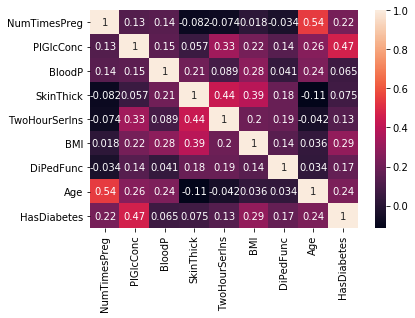

In [0]:
sns.heatmap(dataset.corr(), annot=True)

Seems that greater BMI, Age and PlGlcConc are, the greater probabilities are the patient can develop type 2 diabetes.

# Visualize

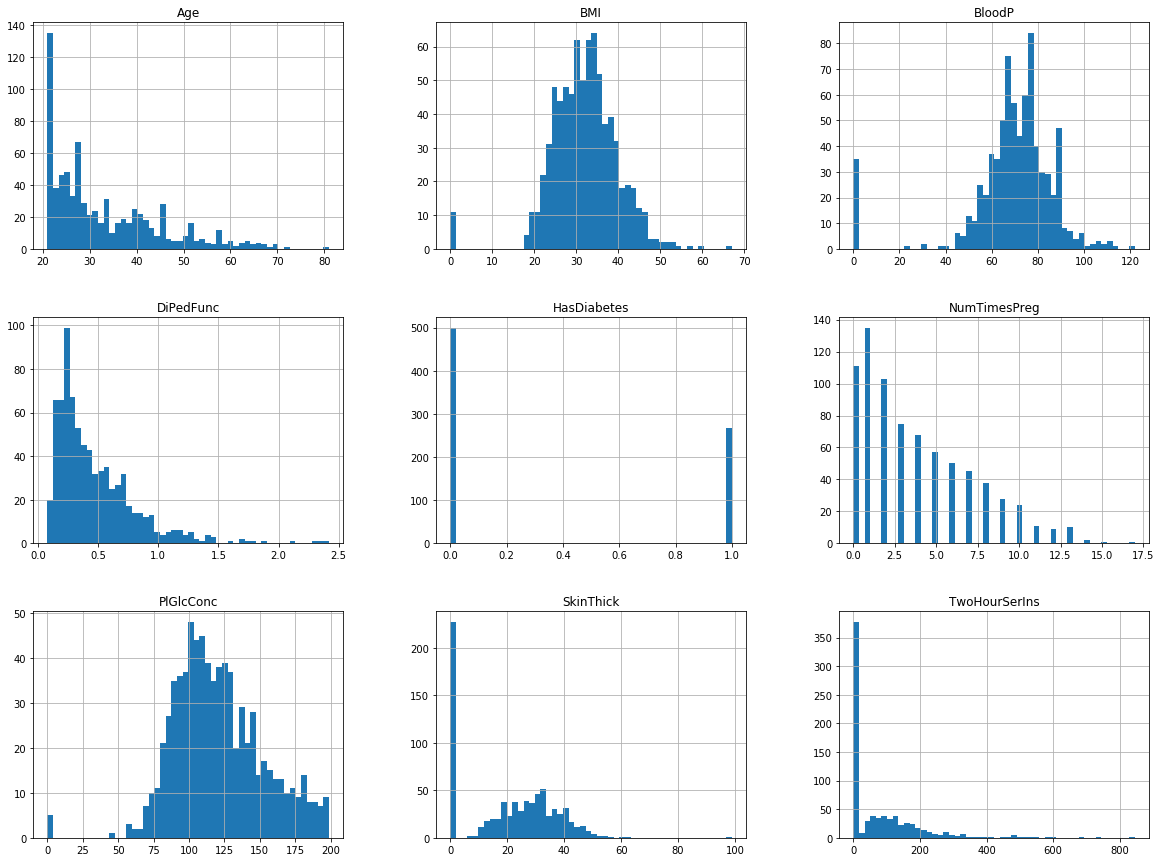

In [0]:
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

# Data transformation

We will replace some 0 values with medians for the fields which may not be 0 like BMI, BloodP...

In [0]:
bmi_median = dataset["BMI"].median()
bloodp_median = dataset["BloodP"].median()
plgl_median = dataset["PlGlcConc"].median()
skin_median = dataset["SkinThick"].median()
twohour_median = dataset["TwoHourSerIns"].median()

dataset["BMI"] = dataset["BMI"].replace(to_replace = 0, value= bmi_median)
dataset["BloodP"] = dataset["BloodP"].replace(to_replace = 0, value= bloodp_median)
dataset["PlGlcConc"] = dataset["PlGlcConc"].replace(to_replace = 0, value= plgl_median)
dataset["SkinThick"] = dataset["SkinThick"].replace(to_replace = 0, value= skin_median)
dataset["TwoHourSerIns"] = dataset["TwoHourSerIns"].replace(to_replace = 0, value= twohour_median)

# Train / Test Split

In [0]:
train_set, test_set = train_test_split(dataset, test_size=0.3, random_state=102)

# seperate labels
train_set_labels = train_set["HasDiabetes"].copy()
test_set_labels = test_set["HasDiabetes"].copy()

train_set = train_set.drop("HasDiabetes", axis=1)
test_set = test_set.drop("HasDiabetes", axis=1)

# Feature scaling

In [0]:
scaler = Scaler()
scaler.fit(train_set)
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
df = pd.DataFrame(data = train_set_scaled)
df.head()

,0,1,2,3,4,5,6,7
0,0.058824,0.883871,0.444444,0.250000,0.198556,0.325153,0.111062,0.283333
1,0.352941,0.393548,0.622222,0.228261,0.018652,0.292434,0.355398,0.083333
2,0.764706,0.400000,0.533333,0.510870,0.018652,0.376278,0.044425,0.400000
3,0.588235,0.412903,0.466667,0.173913,0.018652,0.290389,0.086184,0.350000
4,0.411765,0.548387,0.488889,0.456522,0.132371,0.415133,0.160373,0.366667


#Select and train a model

It is not actually possible which algorithm will work better with our dataset. 
We will compare a few and select the one with best score

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [0]:
from sklearn import model_selection

In [0]:
models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVC", SVC()))
models.append(("LSVC", LinearSVC()))
models.append(("RFC", RandomForestClassifier()))
models.append(("DTR", DecisionTreeRegressor()))

In [0]:
# configuration

seed = 7
results = []
names = []
X = train_set_scaled
Y = train_set_labels

In [0]:
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}, ({})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

LR: 0.7580363382250174, (0.04414375393983067)
KNN: 0.733717679944095, (0.029903704676666528)
NB: 0.7489517819706498, (0.05765098573969512)
SVC: 0.750524109014675, (0.03683740351428678)
LSVC: 0.7617400419287211, (0.053890924503493164)
RFC: 0.7263801537386443, (0.04911695366652357)
DTR: 0.6813417190775681, (0.05539644686943145)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

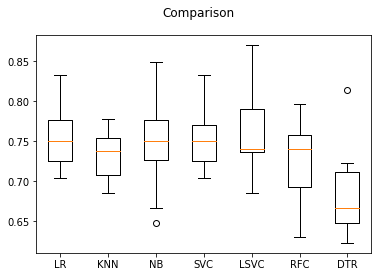

In [0]:
fig = plt.figure()
fig.suptitle("Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Find best parameters for SVC

In [0]:
from sklearn.model_selection import GridSearchCV

grid = {
    "C": [1.0, 10.0, 50.0, 100.0],
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "shrinking": [True, False],
    "gamma": ["auto", 0.001, 0.01, 0.1, 1]
}

model_svc = SVC()
grid_search = GridSearchCV(model_svc, grid, cv=10, scoring="accuracy")
grid_search.fit(train_set_scaled, train_set_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1.0, 10.0, 50.0, 100.0], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'shrinking': [True, False], 'gamma': ['auto', 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [0]:
grid_search.best_score_

0.7728119180633147

#Apply the params and train

In [0]:
svc = grid_search.best_estimator_

#X = np.append(train_set_scaled, test_set_scaled, axis=0)
#Y = np.append(train_set_labels, test_set_labels, axis=0)

svc.fit(train_set_scaled, train_set_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#Make a prediction

In [0]:
idx = 2
prediction = svc.predict(test_set_scaled[[idx]])
print(prediction)

# Fake person having 3 most correlated values high and low
new_df = pd.DataFrame([[6, 168, 75, 35, 0, 43.6, 0.627, 65], [3, 80, 72, 35, 0, 10, 0.627, 30]])
new_df_scaled = scaler.transform(new_df)
prediction_1 = svc.predict(new_df_scaled[[0]]) #should be 1
prediction_2 = svc.predict(new_df_scaled[[1]]) #should be 0

print("Should be 1", prediction_1)
print("Should be 0", prediction_2)

[0]
Should be 1 [1]
Should be 0 [0]
